<b>GUIDED PROJECT - PREDICTING HEART DISEASE
Working with data from numerous cardiac patients, we are using a model to predict cases of future heart disease.<b>

<b>1. IMPORTING and Reading Data<b>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
hd = pd.read_csv('HeartDisease.csv')

<b>2. BASIC DATA ANALYSIS<b>

In [4]:
hd.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
hd.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

ADVANCED DATA ANALYSIS: DATAFRAME METRICS, DATATYPES, NULL COUNTS

In [6]:
hd.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
for col in hd.columns:
    print(col, hd[col].isnull().sum())

Age 0
Sex 0
ChestPainType 0
RestingBP 0
Cholesterol 0
FastingBS 0
RestingECG 0
MaxHR 0
ExerciseAngina 0
Oldpeak 0
ST_Slope 0
HeartDisease 0


OBSERVATIONS:

AGE: Ages range from 28-77 but it's not an even distribution.  The risk of heart disease greatly increases as age increases.

CHOLESTEROL: Based on the median and mean numbers, it appears to be left-skewed (unless there are strong outlyers skewing the data).  There are also incorrect data points as cholesterol cannot be 0.

BLOOD PRESSURE: Here as well, we see datapoint of 0.  That will skew our data
This dataset has no null values.

<b>3. VISUALIZATIONS<b>

Text(0, 0.5, '')

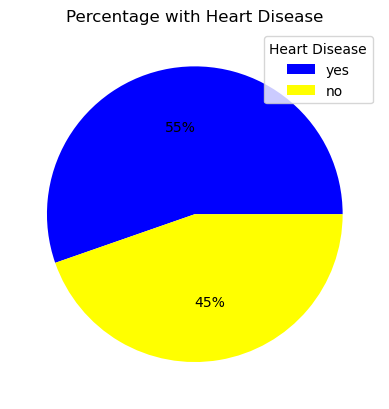

In [8]:
hd['HeartDisease'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%', colors=['blue', 'yellow'], labeldistance=None)
plt.title('Percentage with Heart Disease')
plt.legend(labels=['yes','no'], title='Heart Disease')
plt.ylabel('')

Text(0, 0.5, '')

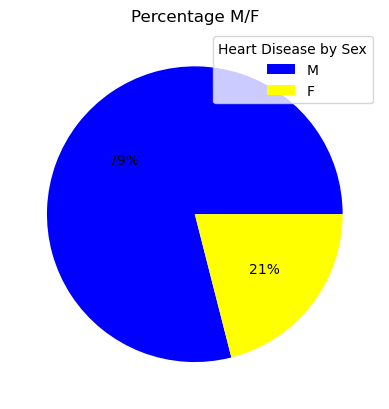

In [9]:
hd['Sex'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%', colors=['blue', 'yellow'], labeldistance=None)
plt.title('Percentage M/F')
plt.legend(labels=['M','F'], title='Heart Disease by Sex')
plt.ylabel('')

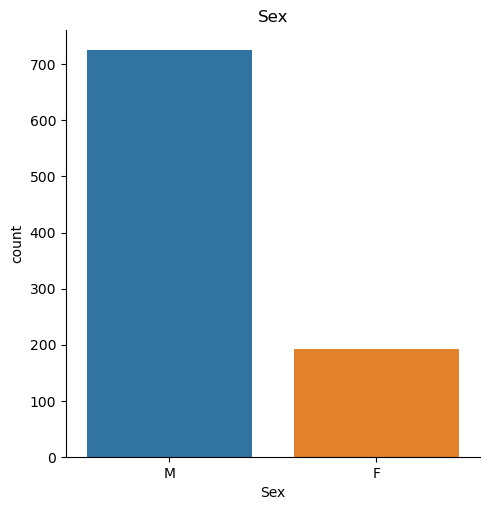

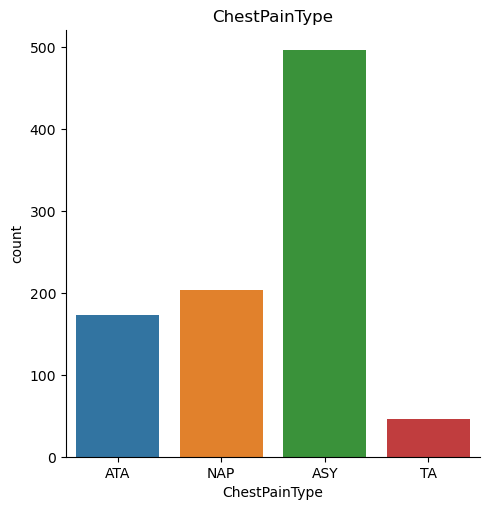

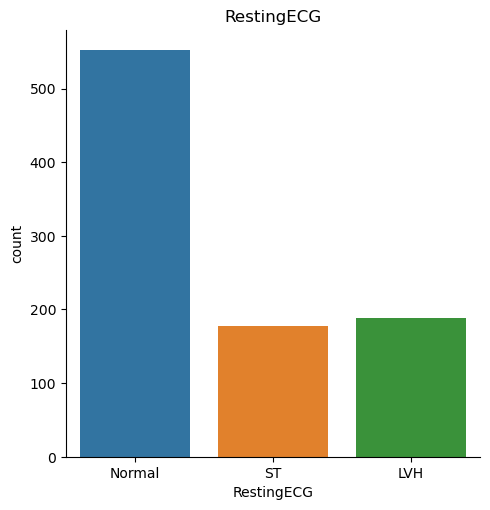

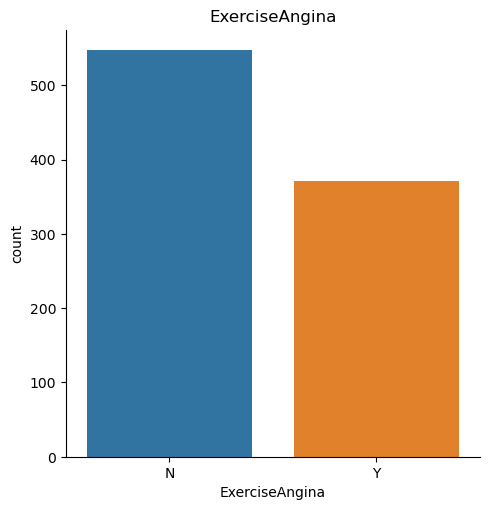

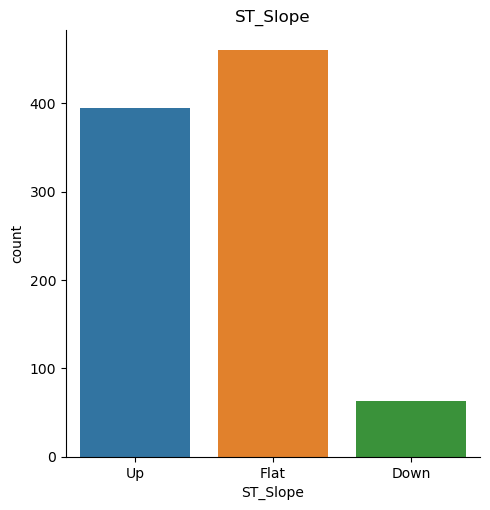

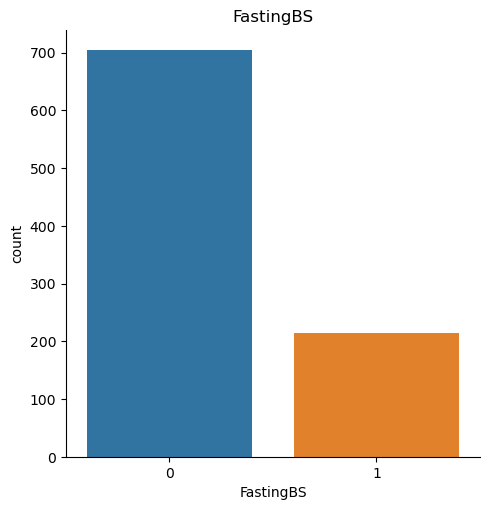

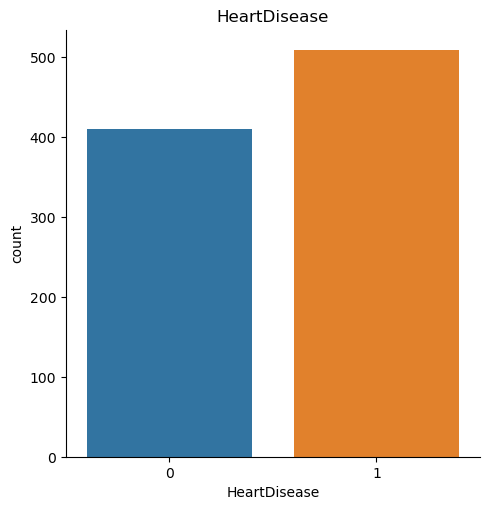

In [10]:
BarPlotsColumns = hd[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']]
for x in BarPlotsColumns:
    sns.catplot(data = hd, x = x, kind= 'count').set(title = x,)
    plt.show()

OBSERVATIONS BASED ON PLOTS:

Heart Disease is much more common in men.  
Most people with heart disease did not have chest pain - they were asymptomatic!
People with lower fasting BS are more likely to have heart disease 
There is suprisingly little difference in the final plot between those who do and don't have heart disease. (Will this make our model harder to train?)

PLOTTING CORRELATIONS TO HEART DISEASE

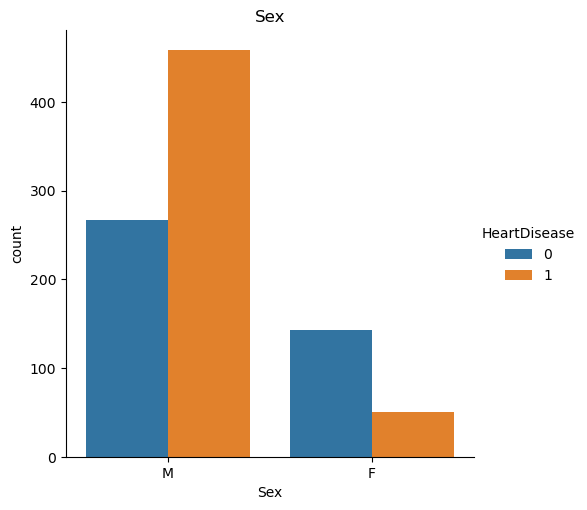

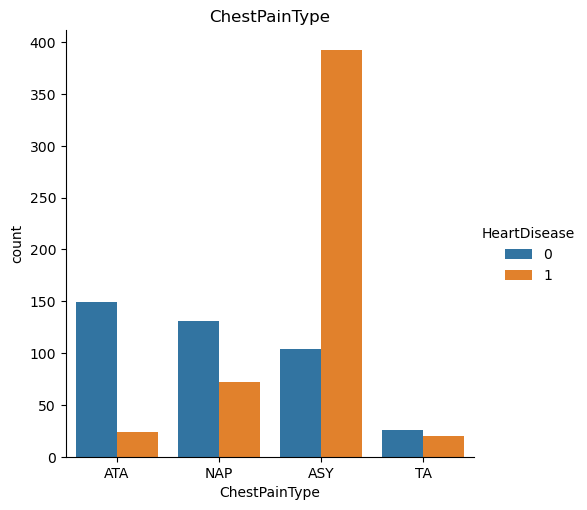

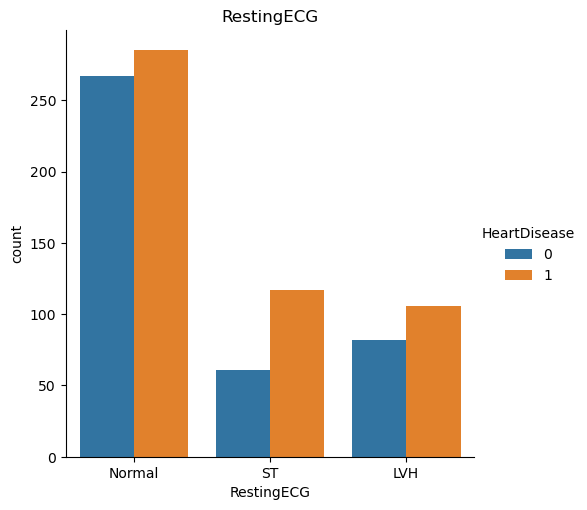

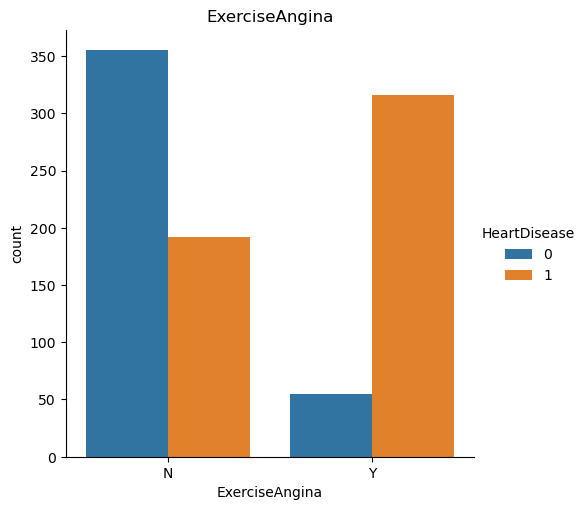

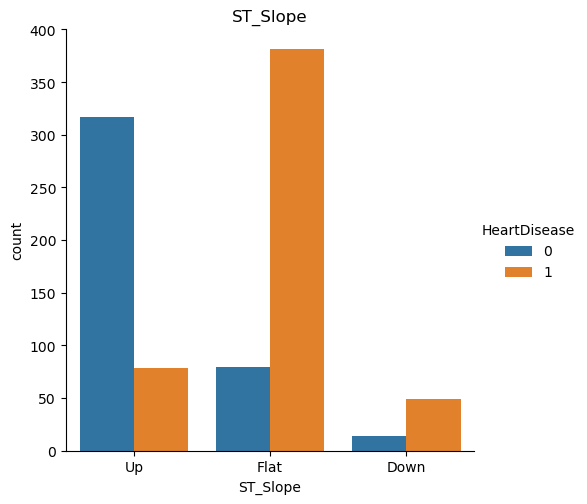

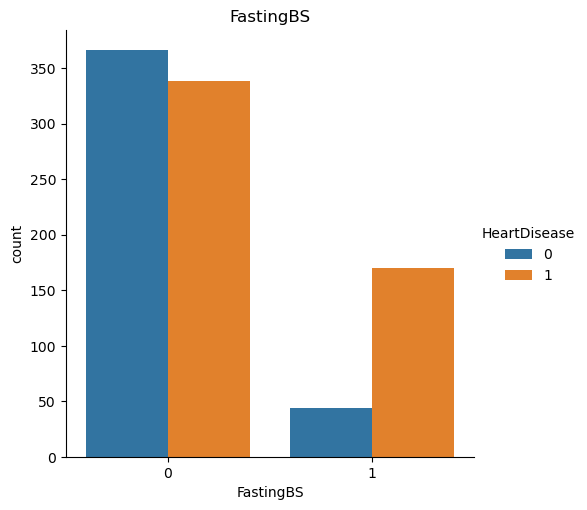

In [11]:
BarPlotsColumns = hd[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']]
for x in BarPlotsColumns:
    sns.catplot(x=x, hue= 'HeartDisease', kind='count', data=hd).set(title=x)
    plt.show()



OBSERVATIONS:

Men are more likely to have heart disease than women.  Majority of those with heart disease do not even have chest pain!  Most people have a normal resting ECG, regardless of whether they have heart disease or not. Exercise Angina and fasting blood sugar have strong correlations to heart disease.  Being that I'm not familiar with all of the cardiac data types presented here, it's hard to make proper observations.  If really working with the data, I'd have to research this information to fully understand what data I'm working with.

<b>4. DATA CLEANING AND PREPARATION<b>

In [12]:
hd[hd==0].count()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS         704
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease      410
dtype: int64

In [13]:
median_chol = hd.loc[hd['HeartDisease'] == 0 & (hd['Cholesterol'] != 0), 'Cholesterol'].median()
hd.loc[(hd['Cholesterol'] == 0) & (hd['HeartDisease'] == 0), 'Cholesterol'] = median_chol
median_chol = hd.loc[hd['HeartDisease'] == 1  & (hd['Cholesterol'] != 0), 'Cholesterol'].median()
hd.loc[(hd['Cholesterol'] == 0) & (hd['HeartDisease'] == 1), 'Cholesterol'] = median_chol

In [14]:
hd.drop(hd[hd.RestingBP == 0 ].index, inplace=True)

In [15]:
hd[hd==0].count()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol         0
FastingBS         703
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease      410
dtype: int64

In [16]:
hd = pd.get_dummies(hd, columns=['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina'], drop_first=True)

I've checked for values equaling 0.  Columns that are booleans can obvioulsy be left with 0 values.  Cholesterol had a high number of 0 values which is clearly in error.  I cannot take the mean and fill it in, as the mean is skewed by the numerous 0 values.  Therefore, I took the mean of the non-zero values and plugged that into the zero values.  The resting blood pressure column only had one row with 0 value so I deleted that.  I then set dummy data columns for the categorical columns.

<b>5.FEATURE SELECTION<b>

CORRELATIONS

In [17]:
correlations = hd.corr()
print(correlations['HeartDisease'])

Age                  0.282012
RestingBP            0.117990
Cholesterol          0.105793
FastingBS            0.267994
MaxHR               -0.401410
Oldpeak              0.403638
HeartDisease         1.000000
Sex_M                0.305118
ChestPainType_ATA   -0.401680
ChestPainType_NAP   -0.215311
ChestPainType_TA    -0.054591
RestingECG_Normal   -0.092452
RestingECG_ST        0.103067
ST_Slope_Flat        0.553700
ST_Slope_Up         -0.621843
ExerciseAngina_Y     0.495490
Name: HeartDisease, dtype: float64


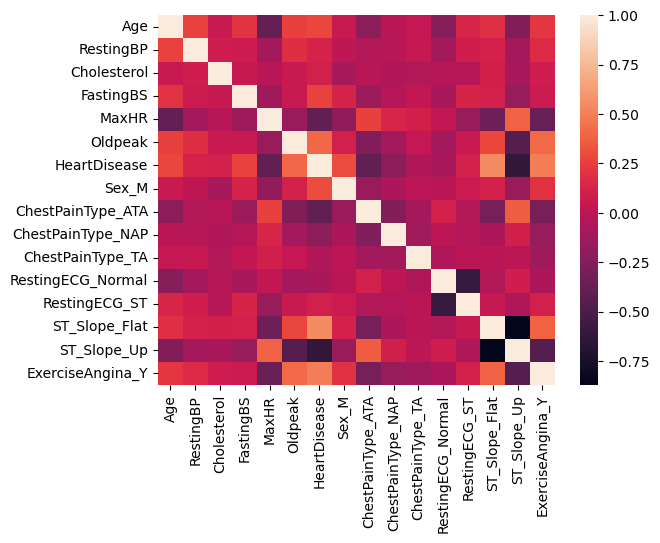

In [18]:
sns.heatmap(correlations)
plt.show()

OBSERVATIONS: The strongest correlations are the St_slopes, followed by ExerciseAngina, ATA Chest Pain, MaxHr, and OldPeak, which all have a relatively similar correlations. I will drop the columns that have insignificant correlation from use in our model.

<b>6. BUILDING A CLASSIFIER 1<b>

In [19]:
X = hd.drop(['HeartDisease', 'RestingBP', 'Cholesterol', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST'], axis=1)
y = hd.HeartDisease

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size =.15, random_state =417)

In [21]:
features=['Age', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ST_Slope_Flat', 'ST_Slope_Up', 'ExerciseAngina_Y']


In [22]:
for f in features:
    knn=KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train[[f]], y_train)
    pred=knn.predict(X_test[[f]])
    accuracy= accuracy_score(pred, y_test)
    print(f, accuracy)

Age 0.5652173913043478
FastingBS 0.6159420289855072
MaxHR 0.6014492753623188
Oldpeak 0.7536231884057971
Sex_M 0.4492753623188406
ChestPainType_ATA 0.7028985507246377
ChestPainType_NAP 0.4492753623188406
ST_Slope_Flat 0.8188405797101449
ST_Slope_Up 0.8405797101449275
ExerciseAngina_Y 0.7318840579710145


I ran this model many times with various n of knn and did not see substatial change in the accuracy levels.  I also ran the model many times with different test sizes and that did change the accuracy level, though not significantly. 
The best performing model was with the ST_Slope_Up, followed by the ST_Slope_Flat.  The worst performing models used ChestPainType_NAP and Sex.
It seems that the accuracy level per feature strongly corresponds with the correlation rates per feature that we saw above.

<B>7. BUILDING A CLASSIFIER 2<B>

In [23]:
X_train, X_TEST, y_train, Y_TEST = train_test_split(X[features], y, test_size=0.2, random_state=417)

mms=MinMaxScaler()

X_train_scaled=mms.fit_transform(X_train)
X_test_scaled=mms.transform(X_test)

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
accuracy=knn.score(X_test_scaled, y_test)

print(accuracy)

0.8768115942028986


OBSERVATIONS: The model performed much better with scaled data than it did without scaled data.

<B>8.HYPERPARAMETER TUNING<B>

In [24]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X[features], y, test_size=0.2, random_state=42)

In [25]:
mms=MinMaxScaler()

X_train_scaled2=mms.fit_transform(X_train2)
X_test_scaled2=mms.transform(X_test2)

parameters = {'n_neighbors': range(3, 25, 2), 'weights':['uniform', 'distance'], 'metric': ['minkowski', 'manhattan']}

knn=KNeighborsClassifier()
knn_grid= GridSearchCV(knn, parameters, scoring='accuracy')
knn_grid.fit(X_train_scaled2, y_train2)

best_score=knn_grid.best_score_
best_parameters=knn_grid.best_params_

In [26]:
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

In [27]:
knn_grid.best_score_

0.8594259621656881

OBSERVATIONS: We've isolated the best parameters per the gridsearchCV: 'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'.  That produced an 85.9% accuracy.  However, that accuracy rate is just below the rate that we originally got.  We'd need to still work with this dataset and tweek the parameters to get to true best parameters for the model.

<B>9.MODEL EVALUATION ON TEST SET<B>

In [28]:
X_train_scaled3=mms.fit_transform(X_train2)
X_test_scaled3=mms.transform(X_test2)
knn_best = knn_grid.best_estimator_

In [29]:
print(knn_best)

KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')


In [30]:
knn_final=KNeighborsClassifier(knn_best)
knn.fit(X_train_scaled, y_train)
accuracy=knn.score(X_test_scaled, y_test)

print(accuracy)


0.8695652173913043


We see that the knn model brought pretty good results but when we tried to tweek it using the GridSearch it did not improve the models accuracy rate.

As far as using this model for real-world healthcare: The purpose of using models to predict people at risk for a specific disease is to help the healthcare system determine who is at higher risk and should therefore undergo preventative care and screening.  In this case, much of the data for our model is only obtained from the screenings, so unless you screen everyone first, you can't run the model to predict their risks.  A good healthcare model is one that takes standard info that is obtained wihout expensive and/or invasive screening and from that info determines who specifically needs to proceed with the screening.  Once they've done the screenings to obtain this information, the doctors can basically tell on their own whether the patient is at risk - it's pretty commonsense.  They don't need to make use of this particular model.

<b>GOOD HEALTH TO ALL!  <B>
